In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [176]:
#Load in your dataset
#If there no columns for your data set you can insert the manually by doing. names =[""]
adult_census = pd.read_csv('adult.csv')


In [177]:
#View your dataset. Understand the features then look for unnecessary ones.
adult_census

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [178]:
#See how much data you have
adult_census.shape

(48842, 15)

In [179]:
#Copy this then delete the columns you dont want and make subset.
adult_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [180]:
adult_census_subset = adult_census[['age', 'workclass', 'fnlwgt', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']]

#Also dropped all rows with people less than 18.
#adult_census_subset.drop(adult_census_subset[(adult_census_subset['age'] < 18)].index, inplace=True)
adult_census_subset

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [181]:
#Check for null values
adult_census_subset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [182]:
#If you did have null values this is what you would do
# adult_census_subset[adult_census_subset['A column'].isna()]

In [183]:
#Shows only the continuous columns. Some categorical may slip in but you can obviously point them out 
adult_census_subset.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [184]:
adult_census_subset.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

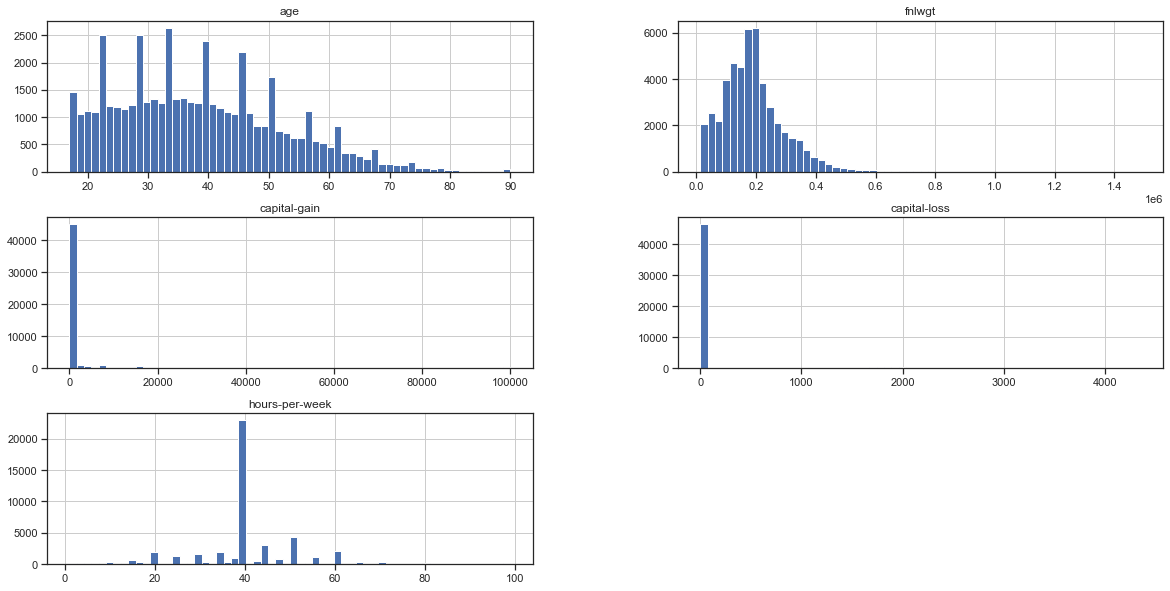

In [185]:
#Look for outliers in the data
adult_census_subset.hist(bins=60, figsize=(20,10))

In [186]:
adult_census_subset['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<AxesSubplot:>

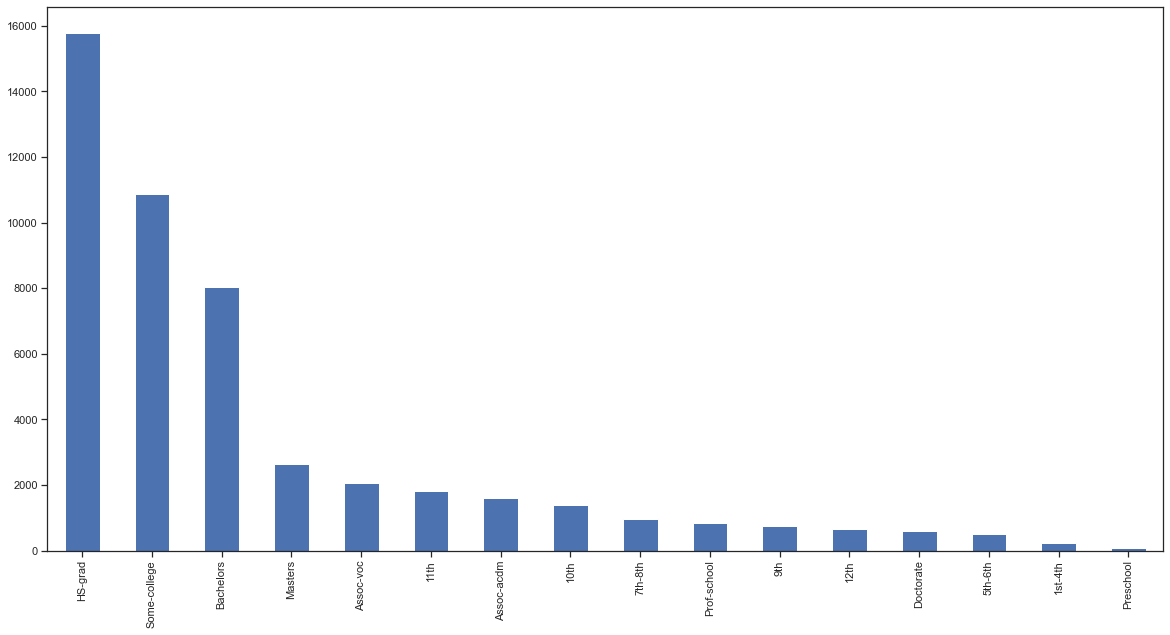

In [187]:
adult_census_subset['education'].value_counts().plot(kind='bar', figsize=(20,10))

In [188]:
incom_st = adult_census_subset[['income']]
incom_st.apply(pd.Series.value_counts)

,income
<=50K,37155
>50K,11687


In [189]:
doctorate = adult_census_subset.loc[adult_census_subset.education == 'Doctorate', : ]

In [190]:
doctorate

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
126,48,Federal-gov,42972,Doctorate,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
133,42,Self-emp-inc,100793,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,41,United-States,>50K
166,58,Self-emp-not-inc,159021,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,>50K
329,64,Self-emp-not-inc,71807,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48710,51,Local-gov,203334,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,>50K
48750,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48751,50,Private,485710,Doctorate,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
48813,34,Private,204461,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [191]:
#I'm going to eliminate all people who don't have a job
adult_census_subset1 = adult_census_subset[adult_census_subset['workclass'] != '?']
adult_census_subset1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [192]:
mask = ((adult_census_subset['workclass'] == '?'))
adult_sc2 = adult_census_subset1



In [193]:
#Check to see how many of these ? values are in the set and they look they are being used as NaN values.
adult_sc2.isin(['?']).sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    811
income              0
dtype: int64

In [194]:
adult_sc2['workclass'] = adult_sc2['workclass'].replace(['?'], np.nan)

/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/607323736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_sc2['workclass'] = adult_sc2['workclass'].replace(['?'], np.nan)


In [195]:
adult_sc2['occupation'] = adult_sc2['occupation'].replace(['?'], np.nan)

/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/212589690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_sc2['occupation'] = adult_sc2['occupation'].replace(['?'], np.nan)


In [196]:
adult_sc2['native-country'] =adult_sc2['native-country'].replace(['?'], np.nan)

/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/2530994375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_sc2['native-country'] =adult_sc2['native-country'].replace(['?'], np.nan)


In [197]:
adult_sc2

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [198]:
adult_sc2.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    811
income              0
dtype: int64

In [199]:
# Now to start the models and stuff
X_train = adult_sc2[['age', 'workclass', 'fnlwgt', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y_train = adult_sc2['income']

In [200]:
m,n=X_train.shape
X_train.to_numpy()

array([[25, 'Private', 226802, ..., 0, 40, 'United-States'],
       [38, 'Private', 89814, ..., 0, 50, 'United-States'],
       [28, 'Local-gov', 336951, ..., 0, 40, 'United-States'],
       ...,
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States'],
       [52, 'Self-emp-inc', 287927, ..., 0, 40, 'United-States']],
      dtype=object)

In [201]:
y_train.shape

(46043,)

In [202]:
y_train[:5]
y_train.to_numpy()

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [203]:
X_train[:5]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [204]:
y_train = y_train.replace(['<=50K'], 0)
y_train = y_train.replace(['>50K'], 1)

In [205]:
y_train[:5]

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64

<AxesSubplot:title={'center':'Income over or under'}, xlabel='income', ylabel='count'>

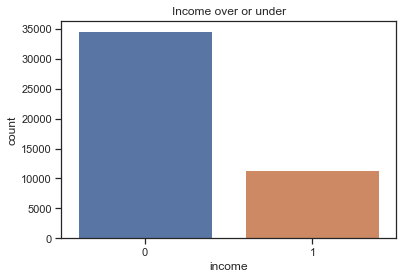

In [206]:
sns.set(style = 'ticks', color_codes =True)
plt.title("Income over or under")
sns.countplot(x = y_train, data = adult_sc2)

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
m,n = X_train.shape
X_train['workclass'] = le.fit_transform(X_train['workclass'])
X_train['education'] = le.fit_transform(X_train['education'])
X_train['occupation'] = le.fit_transform(X_train['occupation'])
X_train['relationship'] = le.fit_transform(X_train['relationship'])
X_train['race'] = le.fit_transform(X_train['race'])
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['native-country'] = le.fit_transform(X_train['native-country'])
X_train['workclass'] = le.fit_transform(X_train['workclass'])
X_train['marital-status'] = le.fit_transform(X_train['marital-status'])










/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/4136002725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['workclass'] = le.fit_transform(X_train['workclass'])
/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/4136002725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['education'] = le.fit_transform(X_train['education'])
/var/folders/cv/c1y7tnrn37l1yphlsh_dl_r80000gn/T/ipykernel_46463/4136002725.py:6: SettingWithCopyWarning: 
A value is trying to be s

In [208]:
X_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,1,4,6,3,2,1,0,0,40,38
1,38,3,89814,11,2,4,0,4,1,0,0,50,38
2,28,1,336951,7,2,10,0,4,1,0,0,40,38
3,44,3,160323,15,2,6,0,2,1,7688,0,40,38
5,34,3,198693,0,4,7,1,4,1,0,0,30,38


In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [168]:
print(lr_model.predict(X_test))

[0 0 0 ... 0 0 0]


In [169]:
print(lr_model.score(X_train, y_train))

0.7975511755443341
